In [1]:
import pandas as pd

In [148]:
data_raw=pd.read_excel('Real estate valuation data set.xlsx')
#data_raw.columns=['交易日期','房龄','到MRT站的距离','便利店数目','纬度','经度','每平方房价']
data_raw.columns=['transaction date','house age','dis to MRT','number of convenience stores','latitude','longitude','house price of unit area']
data_raw.head()
describe=data_raw.describe()
describe
print(describe['house price of unit area'].map(lambda x: x*0.23/3.3))#将台湾房价单位换算成人民币每平方米
#describe.to_excel("describe_output.xlsx")  
print(data_raw.loc[data_raw['house price of unit area'] > 100, ['house price of unit area']])
print(data_raw.loc[270])
data_raw=data_raw.drop([270])
data_raw
#data_raw['dis to MRT']

count    28.854545
mean      2.647104
std       0.948331
min       0.529697
25%       1.930606
50%       2.679848
75%       3.247879
max       8.189394
Name: house price of unit area, dtype: float64
     house price of unit area
270                     117.5
transaction date                2013.333333
house age                         10.800000
dis to MRT                       252.582200
number of convenience stores       1.000000
latitude                          24.974600
longitude                        121.530460
house price of unit area         117.500000
Name: 270, dtype: float64


,transaction date,house age,dis to MRT,number of convenience stores,latitude,longitude,house price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...
409,2013.000000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,2012.666667,5.6,90.45606,9,24.97433,121.54310,50.0
411,2013.250000,18.8,390.96960,7,24.97923,121.53986,40.6
412,2013.000000,8.1,104.81010,5,24.96674,121.54067,52.5


In [3]:
#min-max归一化处理，StandardScaler,MinMaxScaler 
from sklearn import preprocessing
#from sklearn.preprocessing import StandardScaler
scaler = preprocessing.StandardScaler()#sklearn标准化返回的是数组，以下将其转化为数据框形式
data_r=data_raw.drop(['house price of unit area'], axis=1)
data=pd.DataFrame(scaler.fit_transform(data_r),
                 columns=['transaction date','house age','distance to the nearest MRT station','number of convenience stores','latitude','longitude'])
data['house price of unit area']=data_raw['house price of unit area']
data=data.dropna()
print(data)
train_data=data.iloc[:300]#大约75%的数据集用作训练集
test_data=data.iloc[300:412]#大约25%的数据集用作测试集
#train_data

     transaction date  house age  distance to the nearest MRT station  \
0           -0.822569   1.253202                            -0.793550   
1           -0.822569   0.155497                            -0.617787   
2            1.542764  -0.388965                            -0.415329   
3            1.247097  -0.388965                            -0.415329   
4           -1.118236  -1.117841                            -0.551217   
..                ...        ...                                  ...   
408         -0.526902  -0.353838                             2.375146   
409         -1.709569  -1.065151                            -0.789129   
410          0.360098   0.094025                            -0.550899   
411         -0.526902  -0.845610                            -0.777750   
412          1.247097  -0.986117                            -0.789129   

     number of convenience stores  latitude  longitude  \
0                        2.005125  1.125432   0.447782   
1      

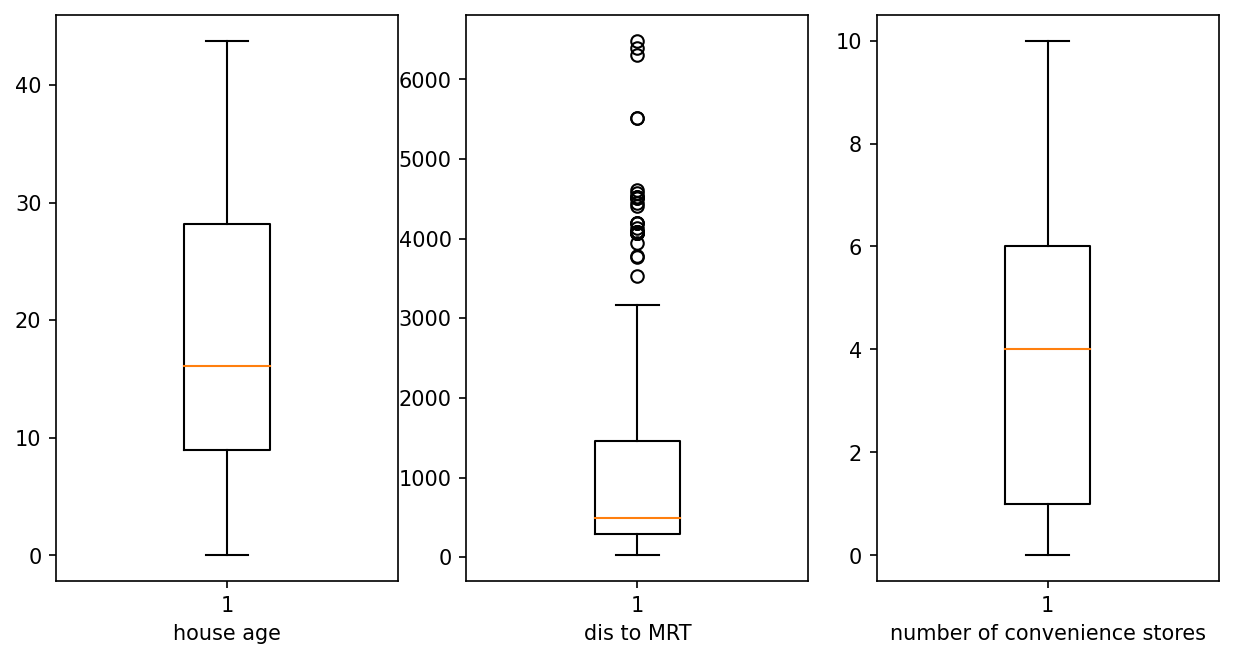

In [4]:
#数据可视化-基于主要解释变量的箱线图
from plotnine import *
import matplotlib.pyplot as plt
#plt.rcParams["font.sans-serif"]=["SimHei"] #设置字体
#plt.rcParams["axes.unicode_minus"]=False #该语句解决图像中的“-”负号的乱码问题
#箱型图
'''
(
    ggplot(data_raw,aes(x='number of convenience stores',y='house age'))
    + geom_boxplot(show_legend=False)
    + scale_fill_hue(s = 0.90, l = 0.65, h=0.0417,color_space='husl')
    + theme_matplotlib()
    + theme(aspect_ratio =1.05,
       dpi=100,
       figure_size=(4,4))
)
'''
fig, ax= plt.subplots(nrows=1, ncols=3,figsize=[10,5],dpi=150) #返回一个图形对象，和三个子图对象
#fig.suptitle('基于主要解释变量的箱线图') #super title


ax[0].boxplot(data_raw['house age'],widths=0.25)
ax[0].set_xlabel('house age')

ax[1].boxplot(data_raw['dis to MRT'],widths=0.25)
ax[1].set_xlabel('dis to MRT')

ax[2].boxplot(data_raw['number of convenience stores'],widths=0.25)
ax[2].set_xlabel('number of convenience stores')

plt.show()
#结果说明到MRT的距离相差比较大
n1=len(data_raw.loc[data_raw['dis to MRT'] > 3000, ['dis to MRT']])#n1=41
n2=len(data_raw.loc[data_raw['dis to MRT'] > 4000, ['dis to MRT']])#n2=33
#print(n1)
#print(n2)

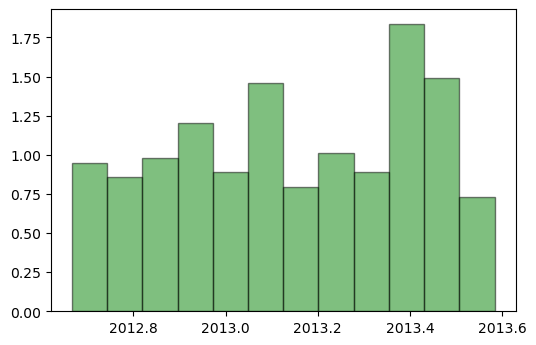

In [140]:
fig=plt.figure(dpi=100)
plt.hist(data_raw['transaction date'], bins = 12, density = True, facecolor = 'g',edgecolor='k',alpha=0.5)
plt.show()

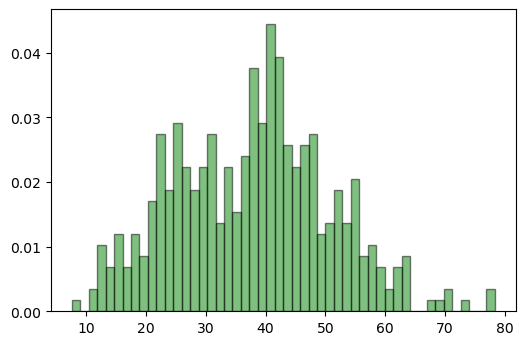

In [145]:
fig=plt.figure(dpi=100)
plt.hist(data_raw['house price of unit area'], bins = 50, density = True, facecolor = 'g',edgecolor='k',alpha=0.5)
#hp=data_raw['house price of unit area']
#hp.plot(kind = 'kde') 
plt.show()
#发现一条异常数据，第270条数据
#房价的分布基本上呈现正态分布

/Users/MC/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


<AxesSubplot:xlabel='house price of unit area', ylabel='Density'>

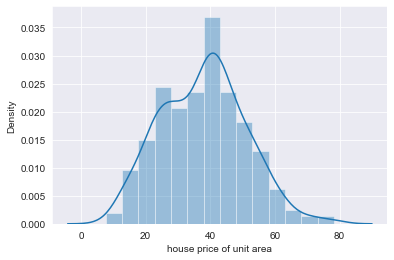

In [7]:
import seaborn as sns

sns.set_style('darkgrid')
sns.distplot(data_raw['house price of unit area'])
#sns.kdeplot(data_raw['house price of unit area'])


<AxesSubplot:xlabel='house price of unit area', ylabel='Density'>

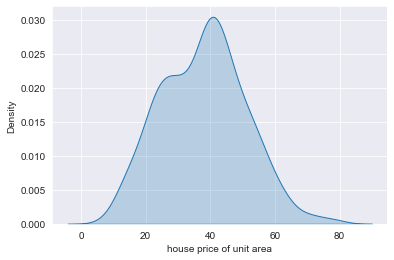

In [8]:
sns.kdeplot(data=data_raw, x="house price of unit area", shade='True')

   COUNTYID COUNTYCODE COUNTYNAME        COUNTYENG  \
12        A      63000        臺北市      Taipei City   
13        F      65000        新北市  New Taipei City   

                                             geometry  
12  POLYGON ((121.57098 25.19717, 121.57097 25.197...  
13  POLYGON ((121.53752 25.30003, 121.53768 25.300...  


/Users/MC/opt/anaconda3/lib/python3.8/site-packages/descartes/patch.py:63: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
/Users/MC/opt/anaconda3/lib/python3.8/site-packages/descartes/patch.py:64: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.


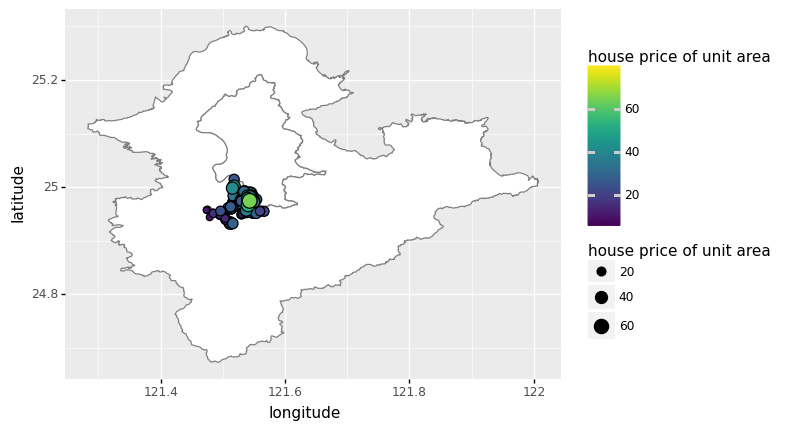

In [7]:
#数据可视化-绘制地图气泡图
import geopandas as gpd 
import pandas as pd 
from plotnine import* 
df=data_raw.iloc[:,4:7]
df
df_map = gpd.GeoDataFrame.from_file('COUNTY_MOI.shp')
df_map = df_map.drop([0,1,2,3,4,5,6,7,8,9,10,11,14,15,16,17,18,19,20,21])
#选择新北，台北，基隆
print(df_map)
#df=pd.merge(right=df_map,left=df) 
df=gpd.GeoDataFrame(df) 

base_plot=(ggplot()+
           geom_map(df_map,fill='white',color='gray')+
           geom_point(df,aes(x='longitude',y='latitude',fill='house price of unit area',size='house price of unit area'),shape='o')
           #geom_text(aes(x='long', y='lat', label='city'),colour="black",size=10,nudge_y=-1.5)
           #scale_size(name='price')
)
print(base_plot)



回归系数如下：
[ 0.04342704 -0.08263035 -0.17521195  0.07067333  0.09394656  0.00637193]
3.5620374562764887
0.6284121937771241
<class 'numpy.ndarray'>
0.43678013208609306
0.24076408807820734
------------------------------
0.5958160308455155


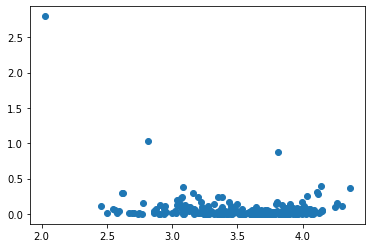

In [268]:
###### 多元线性回归
from sklearn import linear_model
import math
#划分解释变量和因变量
train_data_X=train_data.drop(['house price of unit area'], axis=1)
#train_data_X['col2'] = df['col1'].map(lambda x: x**2)
train_data_y=train_data['house price of unit area']
test_data_X=test_data.drop(['house price of unit area'], axis=1)
test_data_y=test_data['house price of unit area']
train_data_y=train_data_y.map(lambda x: math.log(x))
test_data_y=test_data_y.map(lambda x: math.log(x))
#定义误差
def errors(y,y_hat):
    n=0
    if len(y)!=len(y_hat):
        return 0
    else:
        for i in range(len(y)):
            n+=pow(y[i]-y_hat[i],2)
    return math.sqrt(n/len(y))
#近似erroR
def errorlist(y,y_hat):
    l=[]
    for i in range(len(y)):
        l.append(pow(y[i]-y_hat[i],2))
    return l

#print(train_data_X)
#print(train_data_y)
#调用线性回归模型
reg = linear_model.LinearRegression()
reg.fit(train_data_X,train_data_y)

print("回归系数如下：")
print(reg.coef_)#斜率
print(reg.intercept_)#截距
r_score=reg.score(train_data_X,train_data_y)
print(r_score)
#R^2=0.6353332347315168，线性关系减弱
#reg.score(test_data_X,test_data_y)
#reg.get_params()
testy_hat=reg.predict(test_data_X)
trainy_hat=reg.predict(train_data_X)

print(type(test_data_y.values))#将序列形式转化为数组形式

error_pre=errors(test_data_y.values,testy_hat)
error_reg=errors(train_data_y.values,trainy_hat)
el=errorlist(train_data_y.values,trainy_hat)
plt.scatter(train_data_y,el)#异方差性检验
print(error_pre)
print(error_reg)
print('------------------------------')
print(0.5*(1-error_pre)+0.5*r_score)

In [127]:
#Lasso回归，达到变量选择的效果，将部分特征系数降为0。适用于样本数量较为小的情况
#train_data_X=train_data_X.loc[:,['house age','distance to the nearest MRT station','number of convenience stores','latitude']]
'''
clf = linear_model.Lasso(alpha=1)
clf.fit(train_data_X,train_data_y)

print(clf.coef_)
print(clf.score(train_data_X,train_data_y))
print(clf.intercept_)

#弹性回归
from sklearn.linear_model import ElasticNet
regr = ElasticNet(random_state=0)
regr.fit(train_data_X,train_data_y)

print(regr.coef_)

print(regr.intercept_)
'''

'\nclf = linear_model.Lasso(alpha=1)\nclf.fit(train_data_X,train_data_y)\n\nprint(clf.coef_)\nprint(clf.score(train_data_X,train_data_y))\nprint(clf.intercept_)\n\n#弹性回归\nfrom sklearn.linear_model import ElasticNet\nregr = ElasticNet(random_state=0)\nregr.fit(train_data_X,train_data_y)\n\nprint(regr.coef_)\n\nprint(regr.intercept_)\n'

In [165]:
#岭回归
import numpy as np
clf = linear_model.RidgeCV(alphas = np.logspace(-10, 10, 100))
clf.fit(train_data_X,train_data_y)

#交叉验证法选择最优的alpha
print(clf.alpha_)

clf = linear_model.Ridge(alpha = clf.alpha_)
clf.fit(train_data_X,train_data_y)

print(clf.coef_)
print(clf.score(train_data_X,train_data_y))
r_score=clf.score(train_data_X,train_data_y)
print(clf.intercept_)
testy_hat=clf.predict(test_data_X)
trainy_hat=clf.predict(train_data_X)

error_pre=errors(test_data_y.values,testy_hat)
error_reg=errors(train_data_y.values,trainy_hat)
print(error_pre)
print(error_reg)
print('------------------------------')
print(0.5*(1-error_pre)+0.5*r_score)

8.111308307896856
[ 0.04184383 -0.0804257  -0.16007723  0.0725097   0.09464072  0.01764932]
0.6280190368820473
3.5619630734321337
0.4337365471167987
0.2408914241140344
------------------------------
0.5971412448826243


In [166]:
#稳健回归RObust
ransac = linear_model.TheilSenRegressor()
ransac.fit(train_data_X,train_data_y)
#inlier_mask = ransac.inlier_mask_
#outlier_mask = np.logical_not(inlier_mask)

# Predict data of estimated models
#line_y = lr.predict(line_X)
print(ransac.score(train_data_X,train_data_y))
r_score=ransac.score(train_data_X,train_data_y)
line_y_ransac = ransac.predict(test_data_X)
error_pre=errors(test_data_y.values,line_y_ransac)
print(error_pre)
print('------------------------------')
print(0.5*(1-error_pre)+0.5*r_score)

0.5944172713702598
0.46632691656234115
------------------------------
0.5640451774039593


In [167]:
#多项式回归
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np
model = Pipeline([('poly', PolynomialFeatures(degree=3)),
                  ('linear', LinearRegression(fit_intercept=False))])
# fit to an order-3 polynomial data
model = model.fit(train_data_X,train_data_y)
model.named_steps['linear'].coef_
print(model.score(train_data_X,train_data_y))
testy_hat=model.predict(test_data_X)
trainy_hat=model.predict(train_data_X)
error_pre=errors(test_data_y.values,testy_hat)
error_reg=errors(train_data_y.values,trainy_hat)
print(error_pre)#15.565531450875099
print(error_reg)
r_score=model.score(train_data_X,train_data_y)
print('------------------------------')
print(0.5*(1-error_pre)+0.5*r_score)

0.7934800350531763
0.4803664201450721
0.17949072144735043
------------------------------
0.6565568074540521


[0.4803664201450721, 0.4634799031902756, 0.46028558518126134, 0.4680148803514526, 0.5191494428208314, 0.6003920412481101, 0.4849441125832876]


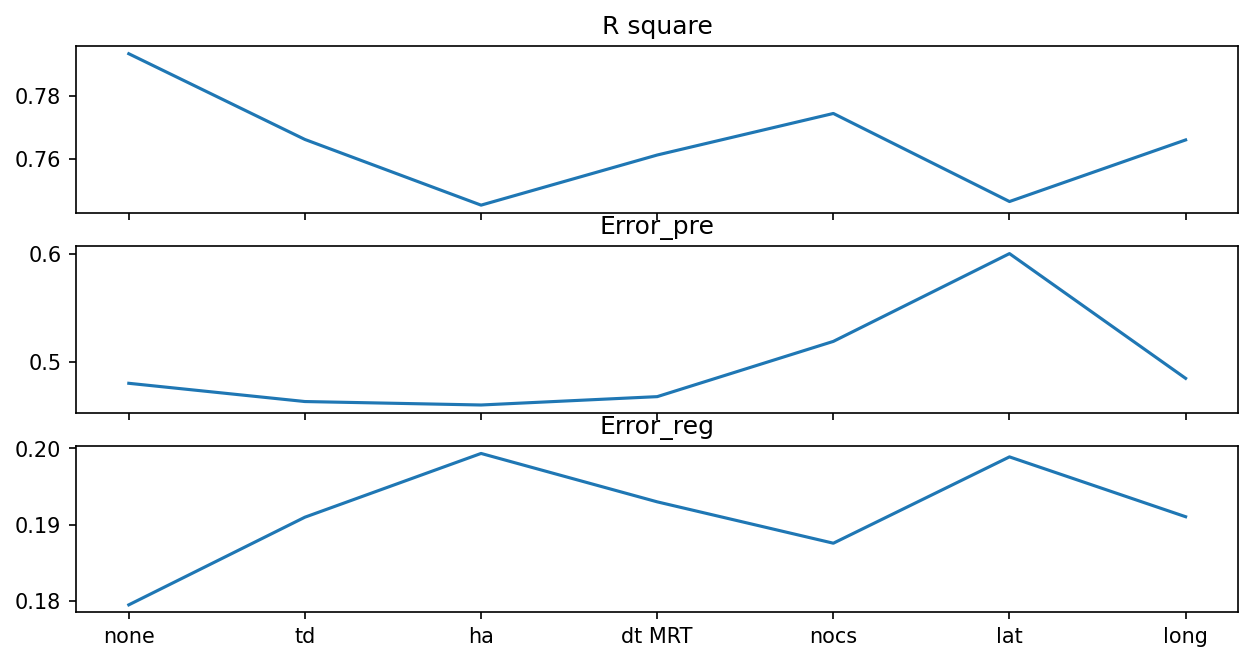

In [252]:
#多项式回归
from sklearn import linear_model
import math
#划分解释变量和因变量
Rscore3=[]
Error_pre3=[]
Error_reg3=[]
column=['transaction date','house age','distance to the nearest MRT station','number of convenience stores','latitude','longitude']
columns=['none','td','ha','dt MRT','nocs','lat','long']
#model = Pipeline([('poly', PolynomialFeatures(degree=3)),
 #                 ('linear', LinearRegression(fit_intercept=False))])

train_data_X=train_data.drop(['house price of unit area'], axis=1)
train_data_y=train_data['house price of unit area']
test_data_X=test_data.drop(['house price of unit area'], axis=1)
test_data_y=test_data['house price of unit area']
train_data_y=train_data_y.map(lambda x: math.log(x))
test_data_y=test_data_y.map(lambda x: math.log(x))
model = Pipeline([('poly', PolynomialFeatures(degree=3)),
                  ('linear', LinearRegression(fit_intercept=False))])
model = model.fit(train_data_X,train_data_y)
model.named_steps['linear'].coef_
Rscore3.append(model.score(train_data_X,train_data_y))
testy_hat=model.predict(test_data_X)
trainy_hat=model.predict(train_data_X)
Error_pre3.append(errors(test_data_y.values,testy_hat))
Error_reg3.append(errors(train_data_y.values,trainy_hat))


for i in column:
    train_data_X=train_data.drop(['house price of unit area'], axis=1)
    train_data_X=train_data_X.drop([i], axis=1)
    #train_data_y=train_data['house price of unit area']
    test_data_X=test_data.drop(['house price of unit area'], axis=1)
    test_data_X=test_data_X.drop([i], axis=1)
    #print(train_data_X)
    model = model.fit(train_data_X,train_data_y)
    #model.named_steps['linear'].coef_
    Rscore3.append(model.score(train_data_X,train_data_y))
    testy_hat=model.predict(test_data_X)
    trainy_hat=model.predict(train_data_X)
    Error_pre3.append(errors(test_data_y.values,testy_hat))
    Error_reg3.append(errors(train_data_y.values,trainy_hat))
    #print(error_pre)#15.565531450875099
    #print(error_reg)
#绘图
fig,ax=plt.subplots(nrows=3, ncols=1,figsize=[10,5],dpi=150,sharex=True) #返回一个图形对象，和三个子图对象
ax[0].plot(columns,Rscore3)
ax[0].set_title('R square')
ax[1].plot(columns,Error_pre3)
ax[1].set_title('Error_pre')
ax[2].plot(columns,Error_reg3)
ax[2].set_title('Error_reg')
plt.savefig('degree3')
print(Error_pre3)

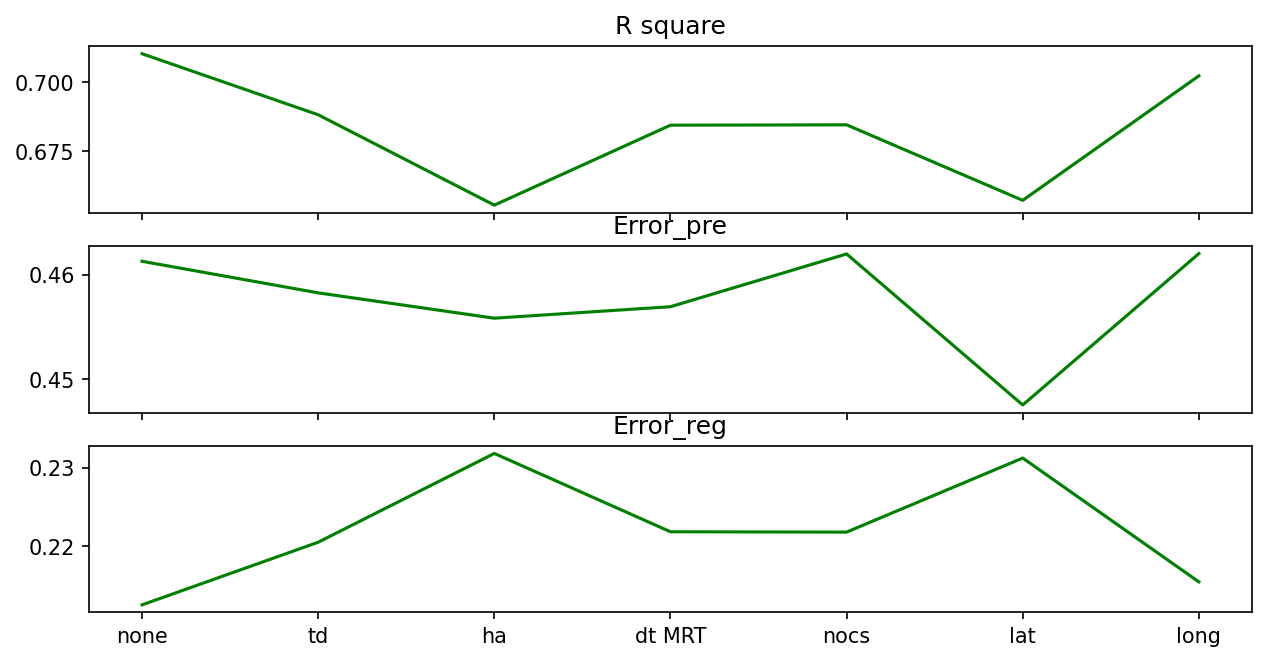

In [159]:
#多项式回归degree=2
from sklearn import linear_model
import math
#划分解释变量和因变量
Rscore2=[]
Error_pre2=[]
Error_reg2=[]
#column=['transaction date','house age','distance to the nearest MRT station','number of convenience stores','latitude','longitude']
#columns=['none','td','ha','dt MRT','nocs','lat','long']
train_data_X=train_data.drop(['house price of unit area'], axis=1)
#train_data_y=train_data['house price of unit area']
test_data_X=test_data.drop(['house price of unit area'], axis=1)
#test_data_y=test_data['house price of unit area']
model = Pipeline([('poly', PolynomialFeatures(degree=2)),
                  ('linear', LinearRegression(fit_intercept=False))])
model = model.fit(train_data_X,train_data_y)
model.named_steps['linear'].coef_
Rscore2.append(model.score(train_data_X,train_data_y))
testy_hat=model.predict(test_data_X)
trainy_hat=model.predict(train_data_X)
Error_pre2.append(errors(test_data_y.values,testy_hat))
Error_reg2.append(errors(train_data_y.values,trainy_hat))

for i in column:
    train_data_X=train_data.drop(['house price of unit area'], axis=1)
    train_data_X=train_data_X.drop([i], axis=1)
    #train_data_y=train_data['house price of unit area']
    test_data_X=test_data.drop(['house price of unit area'], axis=1)
    test_data_X=test_data_X.drop([i], axis=1)
#test_data_X['distance to the nearest MRT station'] = test_data_X['distance to the nearest MRT station'].map(lambda x: x**3)
    #test_data_y=test_data['house price of unit area']
#print(train_data_X)
#print(train_data_y)
#调用线性回归模型

    model = model.fit(train_data_X,train_data_y)
    #model.named_steps['linear'].coef_
    Rscore2.append(model.score(train_data_X,train_data_y))
    testy_hat=model.predict(test_data_X)
    trainy_hat=model.predict(train_data_X)
    Error_pre2.append(errors(test_data_y.values,testy_hat))
    Error_reg2.append(errors(train_data_y.values,trainy_hat))
    #print(error_pre)#15.565531450875099
    #print(error_reg)
#degree=3
fig,ax=plt.subplots(nrows=3, ncols=1,figsize=[10,5],dpi=150,sharex=True) #返回一个图形对象，和三个子图对象
ax[0].plot(columns,Rscore2,c='g')
ax[0].set_title('R square')
ax[1].plot(columns,Error_pre2,c='g')
ax[1].set_title('Error_pre')
ax[2].plot(columns,Error_reg2,c='g')
ax[2].set_title('Error_reg')
plt.savefig('degree2')

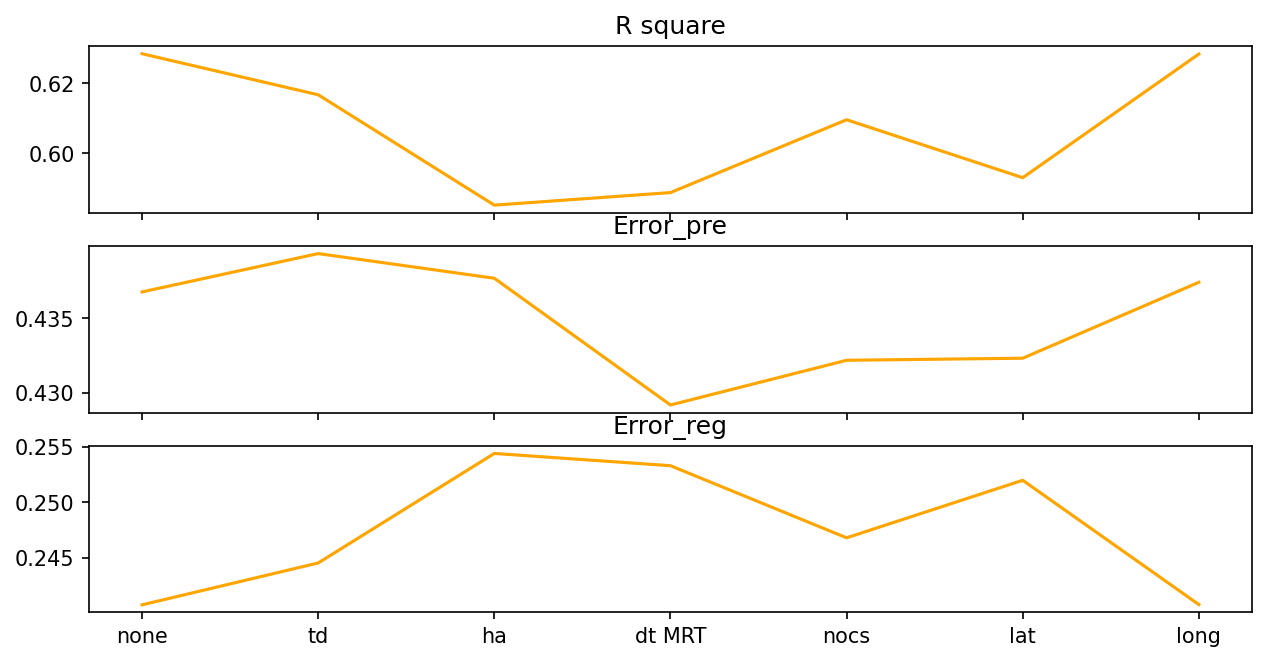

In [160]:
#多项式回归degree=1
from sklearn import linear_model
import math
#划分解释变量和因变量
Rscore1=[]
Error_pre1=[]
Error_reg1=[]
train_data_X=train_data.drop(['house price of unit area'], axis=1)
#train_data_y=train_data['house price of unit area']
test_data_X=test_data.drop(['house price of unit area'], axis=1)
#test_data_y=test_data['house price of unit area']
model = Pipeline([('poly', PolynomialFeatures(degree=1)),
                  ('linear', LinearRegression(fit_intercept=False))])
model = model.fit(train_data_X,train_data_y)
model.named_steps['linear'].coef_
Rscore1.append(model.score(train_data_X,train_data_y))
testy_hat=model.predict(test_data_X)
trainy_hat=model.predict(train_data_X)
Error_pre1.append(errors(test_data_y.values,testy_hat))
Error_reg1.append(errors(train_data_y.values,trainy_hat))

for i in column:
    train_data_X=train_data.drop(['house price of unit area'], axis=1)
    train_data_X=train_data_X.drop([i], axis=1)
    #train_data_y=train_data['house price of unit area']
    test_data_X=test_data.drop(['house price of unit area'], axis=1)
    test_data_X=test_data_X.drop([i], axis=1)
#test_data_X['distance to the nearest MRT station'] = test_data_X['distance to the nearest MRT station'].map(lambda x: x**3)
    #test_data_y=test_data['house price of unit area']
#print(train_data_X)
#print(train_data_y)
#调用线性回归模型

    model = model.fit(train_data_X,train_data_y)
    #model.named_steps['linear'].coef_
    Rscore1.append(model.score(train_data_X,train_data_y))
    testy_hat=model.predict(test_data_X)
    trainy_hat=model.predict(train_data_X)
    Error_pre1.append(errors(test_data_y.values,testy_hat))
    Error_reg1.append(errors(train_data_y.values,trainy_hat))
    #print(error_pre)#15.565531450875099
    #print(error_reg)
#degree=3
fig,ax=plt.subplots(nrows=3, ncols=1,figsize=[10,5],dpi=150,sharex=True) #返回一个图形对象，和三个子图对象
ax[0].plot(columns,Rscore1,c='orange')
ax[0].set_title('R square')
ax[1].plot(columns,Error_pre1,c='orange')
ax[1].set_title('Error_pre')
ax[2].plot(columns,Error_reg1,c='orange')
ax[2].set_title('Error_reg')
plt.savefig('degree1')

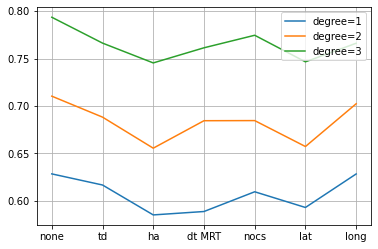

In [161]:
plt.plot(columns,Rscore1,label='degree=1')
plt.plot(columns,Rscore2,label='degree=2')
plt.plot(columns,Rscore3,label='degree=3')
plt.legend()
plt.grid()
plt.savefig('rscore')

[0.6565568074540521,
 0.6513727036876379,
 0.6425312251577332,
 0.6466348428150145,
 0.6276711196068987,
 0.5730524399569128,
 0.6405667288726414]

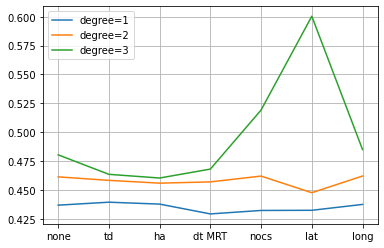

In [254]:
plt.plot(columns,Error_pre1,label='degree=1')
plt.plot(columns,Error_pre2,label='degree=2')
plt.plot(columns,Error_pre3,label='degree=3')
plt.legend()
plt.grid()
plt.savefig('meanerror-pre')
temm=[1.0]*7
Evalue1=list(map(lambda x,y:x-y,temm,Error_pre1))
Evalue2=list(map(lambda x,y:x-y,temm,Error_pre2))
Evalue3=list(map(lambda x,y:x-y,temm,Error_pre3))
Evalue1=list(map(lambda x,y:(x+y)/2,Evalue1,Rscore1))
Evalue2=list(map(lambda x,y:x/2+y/2,Evalue2,Rscore2))
Evalue3=list(map(lambda x,y:(x+y)/2,Evalue3,Rscore3))
Evalue3

In [163]:
#调用statsmodels中的模型进行实现
#OLS
import numpy as np
import statsmodels.api as sm
train_data_X=train_data.drop(['house price of unit area'], axis=1)
train_data_X = sm.add_constant(train_data_X)#添加截距项
#train_data_y=train_data['house price of unit area']
test_data_X=test_data.drop(['house price of unit area'], axis=1)
test_data_X = sm.add_constant(test_data_X)
model = sm.OLS(train_data_y, train_data_X)
results = model.fit()
summary=results.summary()

print(summary)
#调整,去除对因变量影响不显著的解释变量-经度，似乎没什么用
train_data_XX=train_data_X.drop(['longitude'], axis=1)
model2 = sm.OLS(train_data_y, train_data_XX)
result = model2.fit()
summary2=result.summary()
print(summary2)



                               OLS Regression Results                               
Dep. Variable:     house price of unit area   R-squared:                       0.628
Model:                                  OLS   Adj. R-squared:                  0.621
Method:                       Least Squares   F-statistic:                     82.58
Date:                      Sat, 25 Dec 2021   Prob (F-statistic):           4.50e-60
Time:                              19:42:13   Log-Likelihood:                 1.4998
No. Observations:                       300   AIC:                             11.00
Df Residuals:                           293   BIC:                             36.93
Df Model:                                 6                                         
Covariance Type:                  nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------

In [75]:
#调用statsmodels中的模型进行实现
#OLS
import numpy as np
import statsmodels.api as sm
import math
train_data_y=train_data['house price of unit area']
train_data_y=train_data_y.map(lambda x: math.log(x))
model3 = sm.OLS(train_data_y,train_data_X)
result = model3.fit()
result.summary()
#print(summary)

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     house price of unit area   R-squared:                       0.628
Model:                                  OLS   Adj. R-squared:                  0.621
Method:                       Least Squares   F-statistic:                     82.58
Date:                      Sat, 18 Dec 2021   Prob (F-statistic):           4.50e-60
Time:                              19:09:15   Log-Likelihood:                 1.4998
No. Observations:                       300   AIC:                             11.00
Df Residuals:                           293   BIC:                             36.93
Df Model:                                 6                                         
Covariance Type:                  nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                   3.5620      0.014    253.179      0.000       3.534       3.590
transaction date                        0.0434      0.014      3.040      0.003       0.015       0.072
house age                              -0.0826      0.014     -5.839      0.000      -0.110      -0.055
distance to the nearest MRT station    -0.1752      0.031     -5.592      0.000      -0.237      -0.114
number of convenience stores            0.0707      0.018      3.855      0.000       0.035       0.107
latitude                                0.0939      0.018      5.283      0.000       0.059       0.129
longitude                               0.0064      0.026      0.242      0.809      -0.045       0.058
==============================================================================
Omnibus:                      107.506   Durbin-Watson:                   2.173
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              973.970
Skew:                          -1.185   Prob(JB):                    3.20e-212
Kurtosis:                      11.503   Cond. No.                         4.65
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [260]:
#多项式回归+逐步线性回归；
train_data_X=train_data.drop(['house price of unit area'], axis=1)
#X1 = PolynomialFeatures(interaction_only=True,degree=3).fit_transform(train_data_X)#不含单项的高幂次项,似乎不太高
#X1=pd.DataFrame(X1)
train_data_y.index=range(300)
y=train_data_y
#y=train_data_y.map(lambda x: math.log(x))
X2 = PolynomialFeatures(degree=3).fit_transform(train_data_X)
X2=pd.DataFrame(X2)
column=[]
for i in range(len(X2.columns)):
    temp='x{}'.format(i+1)
    column.append(temp)
#print(column)
X2.columns=column
#print(X2)
model4 = sm.OLS(y,X2)
model4.fit().summary()
#print(model4.fit().summary())
#reg0 = linear_model.LinearRegression()
#reg0.fit(X2,y)
#print("-----------------")
#print(reg0.coef_)#斜率
#print(reg0.intercept_)#截距
#print(reg0.score(X2,y))
test_data_X=test_data.drop(['house price of unit area'], axis=1)
X3 = PolynomialFeatures(degree=3).fit_transform(test_data_X)
X3=pd.DataFrame(X3)
column=[]
for i in range(len(X3.columns)):
    temp='x{}'.format(i+1)
    column.append(temp)
#print(column)
X3.columns=column

X2['y']=y
X3['y']=y

#逐步线性回归选择变量
def forward_selected(data,response):
    """前向逐步回归算法，源代码来自https://planspace.org/20150423-forward_selection_with_statsmodels/
    使用Adjusted R-squared来评判新加的参数是否提高回归中的统计显著性
    Linear model designed by forward selection.
    Parameters:
    -----------
    data : pandas DataFrame with all possible predictors and response
    response: string, name of response column in data
    Returns:
    --------
    model: an "optimal" fitted statsmodels linear model
           with an intercept
           selected by forward selection
           evaluated by adjusted R-squared
    """
    remaining = set(data.columns)
    remaining.remove(response)
    selected = []
    current_score, best_new_score = 0.0, 0.0#此处采用Rscore(拟合优度)进行比较也可以使用其他方法比如AIC
    while remaining:
        scores_with_candidates = []
        for candidate in remaining:
            formula = "{} ~ {}".format(response,' + '.join(selected + [candidate]))
            score = smf.ols(formula=formula,data=data).fit().rsquared_adj
            scores_with_candidates.append((score, candidate))
        scores_with_candidates.sort()
        best_new_score, best_candidate = scores_with_candidates.pop()
        if current_score < best_new_score:
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score
        else:break
    formula = "{} ~ {}".format(response,' + '.join(selected))
    print("final formula is {}".format(formula))
    model = smf.ols(formula=formula,data=data).fit()
    #pre=model.predict(test)
 
    return model

model=forward_selected(X2,'y')
#pre=forward_selected(X2,'y',X3)
#打印出最后的回归模型
#print(model.model.formula)
# sl ~ rk + yr + 1
#print(model.params)
# Intercept          16203.268154
#rk[T.associate]     4262.284707
# rk[T.full]          9454.523248
# yr                   375.695643
# dtype: float64
# 0.835190760538
 
print(model.rsquared_adj)


 


final formula is y ~ x4 + x6 + x3 + x19 + x42 + x62 + x14 + x65 + x60 + x2 + x80 + x49 + x55 + x24 + x7 + x81 + x70 + x77 + x82 + x74 + x76 + x69 + x17 + x33 + x31 + x64 + x50 + x59 + x47 + x15 + x41 + x18 + x23 + x16 + x27 + x56
0.7438782486438378


In [261]:
#结果显示
#print(model4.fit().summary())
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                     25.12
Date:                Sun, 26 Dec 2021   Prob (F-statistic):           9.35e-66
Time:                        11:05:52   Log-Likelihood:                 76.563
No. Observations:                 300   AIC:                            -79.13
Df Residuals:                     263   BIC:                             57.91
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.3715      0.032    105.563      0.0

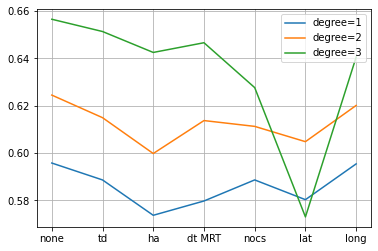

In [255]:
plt.plot(columns,Evalue1,label='degree=1')
plt.plot(columns,Evalue2,label='degree=2')
plt.plot(columns,Evalue3,label='degree=3')
plt.legend()
plt.grid()
plt.savefig('Evalue')

In [267]:


print(Rscore1[0])
print(Rscore2[0])
print(Rscore3[0])
print(Error_pre1[0])
print((1-Error_pre2[0]+0.682)/2)
print((1-Error_pre3[0]+0.714)/2)

0.6284121937771241
0.7103115275303952
0.7934800350531763
0.436780132086093
0.6103623906150427
0.6168167899274639


In [264]:
X3 = PolynomialFeatures(degree=3).fit_transform(test_data_X)
X3=pd.DataFrame(X3)
column=[]
for i in range(len(X3.columns)):
    temp='x{}'.format(i+1)
    column.append(temp)
#print(column)
X3.columns=column
#model.predict(X2)
#X2['contast']=[1]*300
#X22=X2.loc[:,['contast','x4','x6','x3','x42','x19','x62','x14','x65','x60','x80','x35','x57','x49','x24','x7','x81','x70','x77','x82','x47','x76','x74','x69','x32','x17','x64','x50']]

pre_y = model.predict(X3)
pre_y 
error_prey=errors(test_data_y.values,pre_y)
error_prey

0.4769735699049559

In [247]:
#print(pre)
error_pre=errors(test_data_y.values,pre)
print(error_pre)
print((0.751+1-error_pre)/2)

0.4769735699049559
0.6370132150475221


In [262]:
print((0.744+1-0.48)/2)

0.632


In [249]:
print(Error_pre3)

[0.4803664201450721, 0.4634799031902756, 0.46028558518126134, 0.4680148803514526, 0.5191494428208314, 0.6003920412481101, 0.4849441125832876]


In [257]:
print(model4.fit().summary())

                               OLS Regression Results                               
Dep. Variable:     house price of unit area   R-squared:                       0.793
Model:                                  OLS   Adj. R-squared:                  0.714
Method:                       Least Squares   F-statistic:                     9.999
Date:                      Sun, 26 Dec 2021   Prob (F-statistic):           4.43e-42
Time:                              10:59:55   Log-Likelihood:                 89.608
No. Observations:                       300   AIC:                            -11.22
Df Residuals:                           216   BIC:                             299.9
Df Model:                                83                                         
Covariance Type:                  nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------

In [266]:
X4 = PolynomialFeatures(degree=2).fit_transform(train_data_X)
X4=pd.DataFrame(X4)
model5 = sm.OLS(y,X4)
model5.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     house price of unit area   R-squared:                       0.710
Model:                                  OLS   Adj. R-squared:                  0.682
Method:                       Least Squares   F-statistic:                     24.70
Date:                      Sun, 26 Dec 2021   Prob (F-statistic):           4.78e-58
Time:                              11:10:10   Log-Likelihood:                 38.847
No. Observations:                       300   AIC:                            -21.69
Df Residuals:                           272   BIC:                             82.01
Df Model:                                27                                         
Covariance Type:                  nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0              3.4428      0.069     50.155      0.000       3.308       3.578
1              0.0521      0.014      3.837      0.000       0.025       0.079
2             -0.1093      0.017     -6.410      0.000      -0.143      -0.076
3             -0.2983      0.119     -2.512      0.013      -0.532      -0.065
4              0.0629      0.035      1.812      0.071      -0.005       0.131
5              0.0865      0.023      3.803      0.000       0.042       0.131
6              0.0177      0.059      0.301      0.764      -0.098       0.133
7             -0.0041      0.016     -0.260      0.795      -0.035       0.027
8              0.0040      0.014      0.292      0.771      -0.023       0.031
9              0.0380      0.035      1.101      0.272      -0.030       0.106
10             0.0019      0.019      0.102      0.918      -0.035       0.039
11            -0.0122      0.020     -0.610      0.543      -0.052       0.027
12             0.0228      0.030      0.770      0.442      -0.036       0.081
13             0.0586      0.015      3.932      0.000       0.029       0.088
14            -0.0813      0.044     -1.850      0.065      -0.168       0.005
15            -0.0045      0.017     -0.265      0.792      -0.038       0.029
16            -0.0312      0.023     -1.333      0.184      -0.077       0.015
17            -0.0501      0.038     -1.332      0.184      -0.124       0.024
18            -0.0161      0.053     -0.303      0.762      -0.121       0.089
19            -0.0468      0.073     -0.645      0.519      -0.190       0.096
20            -0.1463      0.042     -3.444      0.001      -0.230      -0.063
21            -0.0395      0.051     -0.774      0.440      -0.140       0.061
22            -0.0139      0.022     -0.643      0.521      -0.057       0.029
23            -0.1266      0.035     -3.652      0.000      -0.195      -0.058
24            -0.0024      0.058     -0.041      0.967      -0.117       0.112
25             0.0295      0.030      0.994      0.321      -0.029       0.088
26            -0.0603      0.045     -1.346      0.179      -0.148       0.028
27             0.0003      0.066      0.004      0.997      -0.130       0.130
==============================================================================
Omnibus:                      155.634   Durbin-Watson:                   2.329
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2183.474
Skew:                          -1.754   Prob(JB):                         0.00
Kurtosis:                      15.742   Cond. No.                         63.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly speci